In [10]:
import os
if not os.path.exists('data'):
    os.makedirs('data')

!curl -L -o data/final_database.csv "https://www.dropbox.com/scl/fi/j0yasupjf1nln4jhh40hd/final_database.csv?rlkey=gxa8cqm23y9owq1lcuuzgvub4&st=0o9qf8tk&dl=0"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     28      0 --:--:-- --:--:-- --:--:--    28
100  107M  100  107M    0     0  9388k      0  0:00:11  0:00:11 --:--:-- 10.4M


## Library imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## Data path

In [4]:
DATA_PATH = 'data/final_database.csv'

We first read the dataset

In [5]:
data = pd.read_csv(DATA_PATH)
data.head()

,"<!DOCTYPE html><html><head><title>Google Drive - Virus scan warning</title><meta http-equiv=""content-type"" content=""text/html; charset=utf-8""/><style nonce=""tI-joJuTODOPr7L_XJwx_g"">.goog-link-button{position:relative;color:#15c;text-decoration:underline;cursor:pointer}.goog-link-button-disabled{color:#ccc;text-decoration:none;cursor:default}body{color:#222;font:normal 13px/1.4 arial",sans-serif;margin:0}.grecaptcha-badge{visibility:hidden}.uc-main{padding-top:50px;text-align:center}#uc-dl-icon{display:inline-block;margin-top:16px;padding-right:1em;vertical-align:top}#uc-text{display:inline-block;max-width:68ex;text-align:left}.uc-error-caption,".uc-warning-caption{color:#222;font-size:16px}#uc-download-link{text-decoration:none}.uc-name-size a{color:#15c;text-decoration:none}.uc-name-size a:visited{color:#61c;text-decoration:none}.uc-name-size a:active{color:#d14836;text-decoration:none}.uc-footer{color:#777;font-size:11px;padding-bottom:5ex;padding-top:5ex;text-align:center}.uc-footer a{color:#15c}.uc-footer a:visited{color:#61c}.uc-footer a:active{color:#d14836}.uc-footer-divider{color:#ccc;width:100%}.goog-inline-block{position:relative;display:-moz-inline-box;display:inline-block}* html .goog-inline-block{display:inline}*:first-child+html .goog-inline-block{display:inline}sentinel{}</style><link rel=""icon"" href=""//ssl.gstatic.com/docs/doclist/images/drive_2022q3_32dp.png""/></head><body><div class=""uc-main""><div id=""uc-dl-icon"" class=""image-container""><div class=""drive-sprite-aux-download-file""></div></div><div id=""uc-text""><p class=""uc-warning-caption"">Google Drive can't scan this file for viruses.</p><p class=""uc-warning-subcaption""><span class=""uc-name-size""><a href=""/open?id=1QSfPajHrEzWl6AQpn-8icCotY7B2QsxR"">final_database.csv</a> (107M)</span> is too large for Google to scan for viruses. Would you still like to download this file?</p><form id=""download-form"" action=""https://drive.usercontent.google.com/download"" method=""get""><input type=""submit"" id=""uc-download-link"" class=""goog-inline-block jfk-button jfk-button-action"" value=""Download anyway""/><input type=""hidden"" name=""id"" value=""1QSfPajHrEzWl6AQpn-8icCotY7B2QsxR""><input type=""hidden"" name=""export"" value=""download""><input type=""hidden"" name=""confirm"" value=""t""><input type=""hidden"" name=""uuid"" value=""5cd59b92-d675-40ca-9df5-e7a9d29a4966""></form></div></div><div class=""uc-footer""><hr class=""uc-footer-divider""></div></body></html>"


We print the different columns

In [4]:
for i, column in enumerate(data.columns):
    print(i, column)

0 Country
1 Uri
2 Popularity
3 Title
4 Artist
5 Album/Single
6 Genre
7 Artist_followers
8 Explicit
9 Album
10 Release_date
11 Track_number
12 Tracks_in_album
13 danceability
14 energy
15 key
16 loudness
17 mode
18 speechiness
19 acoustics
20 instrumentalness
21 liveliness
22 valence
23 tempo
24 duration_ms
25 time_signature
26 Genre_new
27 Days_since_release
28 Released_after_2017
29 Explicit_false
30 Explicit_true
31 album
32 compilation
33 single
34 bolero
35 boy band
36 country
37 dance/electronic
38 else
39 funk
40 hip hop
41 house
42 indie
43 jazz
44 k-pop
45 latin
46 metal
47 opm
48 pop
49 r&b/soul
50 rap
51 reggae
52 reggaeton
53 rock
54 trap
55 syuzhet_norm
56 bing_norm
57 afinn_norm
58 nrc_norm
59 syuzhet
60 bing
61 afinn
62 nrc
63 anger
64 anticipation
65 disgust
66 fear
67 joy
68 sadness
69 surprise
70 trust
71 negative
72 positive
73 n_words
74 anger_norm
75 anticipation_norm
76 disgust_norm
77 fear_norm
78 joy_norm
79 sadness_norm
80 surprise_norm
81 trust_norm
82 negative

We will drop columns that are one-hot-encoded countries, genres, topics, and other columns that are not useful for our analysis

In [9]:
countries = list(data.columns[112:147]) 

genres = list(data.columns[34:55])

lda_topics = list(data.columns[101:109])

columns_to_drop = countries +  genres + lda_topics + ["Uri", "Track_number", "Tracks_in_album", "Explicit_false", "Explicit_true", "album", "single",
                                                 "bolero", "Released_after_2017"]

We process the release date to get the year and month

In [10]:
data_filtered = data.drop(columns = columns_to_drop)
data_filtered["Release_date"] = pd.to_datetime(data_filtered["Release_date"].apply(lambda x: np.nan if x == "n-a" else x), format = "mixed")

Data description

In [11]:
data_filtered.describe()

,Popularity,Release_date,Days_since_release,compilation,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Popu_max,Top10_dummy,Top50_dummy
count,170633.000000,170628,167411.000000,170633.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71392.000000,71392.000000,71392.000000,71392.000000,71392.000000,71392.000000,71392.000000,71392.000000,71449.000000,71449.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000
mean,5417.616264,2016-10-08 15:17:31.466347776,1337.530228,0.015026,0.057969,-0.189603,-0.055423,0.023168,-0.018181,-1.083197,-2.512649,0.008432,2.787020,3.120432,1.929814,2.957129,3.191662,2.757911,1.876687,3.215443,5.433139,5.441572,313.905421,0.008396,0.010360,0.005804,0.009313,0.010905,0.008997,0.006219,0.010330,0.017027,0.017758,0.114947,0.150568,0.079596,0.127251,0.163345,0.129950,0.087283,0.147060,0.483059,0.516941,3.595803,7.447833,-0.220842,0.582584,0.055673,0.361743,0.226668,0.047693,0.146812,89.926738,0.087035,0.294843
min,0.800000,1899-12-31 00:00:00,9.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-22.500000,-31.000000,-70.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,77.600000,2017-06-02 00:00:00,428.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.650000,-3.000000,-7.000000,-2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,206.000000,0.003333,0.005155,0.000000,0.003876,0.005357,0.003906,0.002710,0.005051,0.008949,0.010230,0.062500,0.096774,0.000000,0.076923,0.093750,0.071429,0.044444,0.095238,0.350000,0.378378,0.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,515.150000,2018-07-20 00:00:00,834.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.200000,-1.000000,0.000000,0.000000,2.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,3.000000,4.000000,4.000000,285.000000,0.007220,0.009174,0.004854,0.007812,0.009501,0.007772,0.005505,0.009009,0.015152,0.015748,0.115385,0.142857,0.076923,0.125000,0.148936,0.125000,0.083333,0.142857,0.500000,0.500000,1.000000,5.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000,0.000000,0.000000
75%,3867.850000,2019-09-06 00:00:00,1240.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.900000,1.000000,4.000000,2.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,7.000000,7.000000,386.000000,0.012346,0.013986,0.008621,0.013308,0.014458,0.012500,0.008734,0.014019,0.022814,0.023188,0.166667,0.200000,0.117647,0.172414,0.214286,0.176471,0.121212,0.200000,0.621622,0.650000,5.000000,10.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,138.000000,0.000000,1.000000
max,23376

In [12]:
print("Number of attributes:", len(data_filtered.columns))
print("Number of unique songs:", data["Title"].nunique())
print("Number of unique artists:", data["Artist"].nunique())

Number of attributes: 79
Number of unique songs: 47045
Number of unique artists: 25524


In [22]:
# Check for missing values
missing_values_percentage = data_filtered.isnull().sum() / len(data_filtered)
print("Maximum percentage of missing values: ", max(missing_values_percentage))
missing_values = data_filtered.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index
print("Number of columns with missing values: ", len(columns_with_missing_values))


Maximum percentage of missing values:  0.5816049650419322
Number of columns with missing values:  49


In [26]:
# Check if most important columns have missing values
important_columns = ["Country", "Popularity", "Title", "Artist", "Album/Single", "Genre", "Artist_followers", "Album"]
print("Missing values in important columns: ", True in [col in columns_with_missing_values for col in important_columns])

Missing values in important columns:  True


## Exploratory Data Analysis

(array([  541.,   327.,   443.,   530.,   494.,   515.,   553.,   641.,
          469.,   440.,   689.,  1235.,  1046.,  1394.,  1383.,  2749.,
         8341., 35133., 40106., 67087.]),
 array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
        2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
        2018., 2019., 2020.]),
 <BarContainer object of 20 artists>)

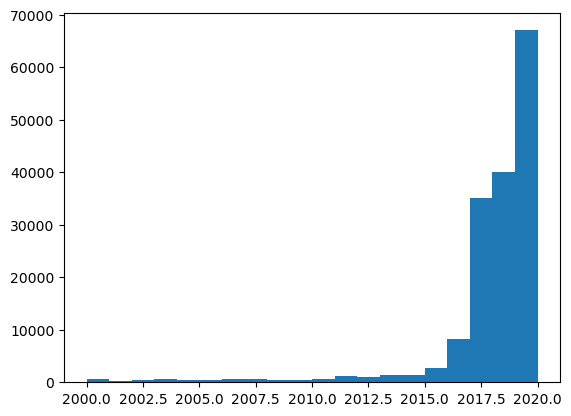

In [16]:
data_filtered_subset = data_filtered[data_filtered["Release_date"].dt.year >= 2000]

# Plot histogram
plt.hist(data_filtered_subset["Release_date"].dt.year, bins=20)